In [82]:
import requests
from bs4 import BeautifulSoup

In [83]:
url = 'https://wheeloffortuneanswer.com'

In [84]:
requests.get(url)

<Response [200]>

In [85]:
page = requests.get(url)
page

<Response [200]>

In [86]:
soup = BeautifulSoup(page.text, 'html')
print(soup)

<!DOCTYPE html>

<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0" name="viewport"/>
<link href="//gmpg.org/xfn/11" rel="profile"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<title>Best Wheel of Fortune Solution Database - Wheel of Fortune Answer</title><link as="style" data-rocket-preload="" href="https://fonts.googleapis.com/css?family=Open%20Sans%3A400%2C700%2C700italic%2C400italic%7COpen%20Sans%20Condensed%3A300%2C700%7CAlegreya%3A400%2C400italic%2C700%2C700italic%7CAlegreya%20Sans%3A400%2C400italic%2C700%2C700italic%7CDroid%20Sans%3A400%2C700%7CDroid%20Serif%3A400%2C400italic%2C700%2C700italic%7CExo%202%3A400%2C700%7CLato%3A400%2C400italic%2C700%2C700italic%7CLora%3A400%2C400italic%2C700%2C700italic%7CArvo%3A400%2C700%2C400italic%2C700italic%7CRoboto%3A400%2C400italic%2C700%2C700it

In [87]:
print(soup.prettify())

<!DOCTYPE html>
<head>
 <meta charset="utf-8"/>
 <meta content="width=device-width,initial-scale=1.0" name="viewport"/>
 <link href="//gmpg.org/xfn/11" rel="profile"/>
 <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
 <style>
  img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }
 </style>
 <title>
  Best Wheel of Fortune Solution Database - Wheel of Fortune Answer
 </title>
 <link as="style" data-rocket-preload="" href="https://fonts.googleapis.com/css?family=Open%20Sans%3A400%2C700%2C700italic%2C400italic%7COpen%20Sans%20Condensed%3A300%2C700%7CAlegreya%3A400%2C400italic%2C700%2C700italic%7CAlegreya%20Sans%3A400%2C400italic%2C700%2C700italic%7CDroid%20Sans%3A400%2C700%7CDroid%20Serif%3A400%2C400italic%2C700%2C700italic%7CExo%202%3A400%2C700%7CLato%3A400%2C400italic%2C700%2C700italic%7CLora%3A400%2C400italic%2C700%2C700italic%7CArvo%3A400%2C700%2C400italic%2C700italic%7CRoboto%3A400%2C400ita

In [88]:
soup.find('div')

<div id="wvrx-page-width"> </div>

In [89]:
soup.find_all('div',class_='')

[]

In [90]:
soup.find_all('table')

[<table class="tablepress tablepress-id-73" id="tablepress-73">
 <thead>
 <tr class="row-1">
 <th class="column-1">Category<br/>
 (Full Answer)</th><th class="column-2">Filter<br/>
 (Beta)</th>
 </tr>
 </thead>
 <tbody class="row-striping row-hover">
 <tr class="row-2">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/around-the-house/">Around the House</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Around%20the%20House.">Around the House Filter</a></td>
 </tr>
 <tr class="row-3">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/before-and-after/">Before and After</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?category=Before%20and%20After.">Before and After Filter</a></td>
 </tr>
 <tr class="row-4">
 <td class="column-1"><a href="https://wheeloffortuneanswer.com/book-title/">Book Title (Best Seller)</a></td><td class="column-2"><a href="https://wheeloffortuneanswer.com/filter/?catego

## Extract all my table heads

In [91]:
soup.find_all('th')

[<th class="column-1">Category<br/>
 (Full Answer)</th>,
 <th class="column-2">Filter<br/>
 (Beta)</th>]

In [92]:
title = soup.find_all('th')
titles = [title.text.replace('\n','').strip() for title in title]

In [93]:
print(titles)

['Category(Full Answer)', 'Filter(Beta)']


In [94]:
import pandas as pd
df = pd.DataFrame(columns=titles)
df

,Category(Full Answer),Filter(Beta)


In [95]:
table = soup.find_all('table')
column_data = soup.find_all('tr')

In [96]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    df.loc[len(df)] = individual_row_data

In [97]:
df

,Category(Full Answer),Filter(Beta)
0,Around the House,Around the House Filter
1,Before and After,Before and After Filter
2,Book Title (Best Seller),Book Title (Best Seller) Filter
3,Classic Movie,Classic Movie Filter
4,Classic TV,Classic TV Filter
5,College Life,Not Available.
6,Event,Event Filter
7,Family,Family Filter
8,Fictional Character,Fictional Character Filter
9,Fictional Place,Fictional Place Filter


In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating word cloud for single column

In [99]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    df.loc[len(df)] = individual_row_data

In [100]:
df

,Category(Full Answer),Filter(Beta)
0,Around the House,Around the House Filter
1,Before and After,Before and After Filter
2,Book Title (Best Seller),Book Title (Best Seller) Filter
3,Classic Movie,Classic Movie Filter
4,Classic TV,Classic TV Filter
...,...,...
95,Title,Title Filter
96,TV Show Title,TV Show Title Filter
97,What Are You Doing,What Are You Doing Filter
98,What Are You Wearing,Not Available.


In [101]:
text = ''.join(df['Category(Full Answer)'])
text

'Around the HouseBefore and AfterBook Title (Best Seller)Classic MovieClassic TVCollege LifeEventFamilyFictional CharacterFictional PlaceFood and DrinkFun and GamesHeadlineHusband and WifeIn the KitchenLandmarkLiving ThingMegawordMovie QuotesMovie TitleOccupationOn the MapPeoplePersonPhrasePlaceProper NameQuotationRhyme TimeRock OnSame LetterSame NameShow BizSloganSong/ArtistSong LyricsSong TitleStar and RoleThe 50’sThe 60’sThe 70’sThe 80’sThe 90’sThingTitle/AuthorTitleTV Show TitleWhat Are You DoingWhat Are You WearingWhere Are We GoingAround the HouseBefore and AfterBook Title (Best Seller)Classic MovieClassic TVCollege LifeEventFamilyFictional CharacterFictional PlaceFood and DrinkFun and GamesHeadlineHusband and WifeIn the KitchenLandmarkLiving ThingMegawordMovie QuotesMovie TitleOccupationOn the MapPeoplePersonPhrasePlaceProper NameQuotationRhyme TimeRock OnSame LetterSame NameShow BizSloganSong/ArtistSong LyricsSong TitleStar and RoleThe 50’sThe 60’sThe 70’sThe 80’sThe 90’sThingT

<function matplotlib.pyplot.show(close=None, block=None)>

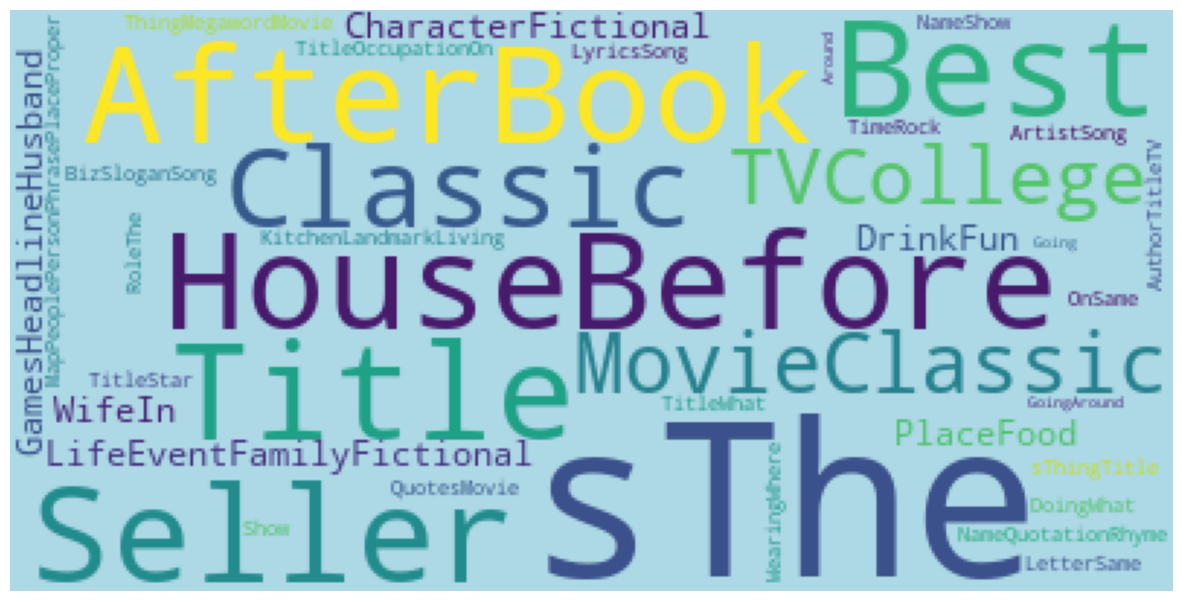

In [108]:
wordcloud = WordCloud(background_color= 'lightblue').generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show